<a href="https://colab.research.google.com/github/mohssinehamada/Fake_News_detection/blob/main/Fake_News_dataction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import os

In [2]:
true_df = pd.read_csv("/content/True.csv")
fake_df = pd.read_csv("/content/Fake.csv", engine='python', on_bad_lines='skip')

In [3]:
print("True data:")
print(true_df.head(), "\n")

True data:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017    



In [4]:
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
print("Fake data:")
print(fake_df.head(), "\n")

Fake data:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017   



In [6]:
fake_df = fake_df.loc[:, ~fake_df.columns.str.contains('^Unnamed')]

In [7]:
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [8]:
true_df['label'] = "True"
fake_df['label'] = "Fake"


In [9]:
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [10]:
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [11]:
true_df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


In [12]:
fake_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [13]:
fake_df.shape

(23481, 5)

In [14]:
true_df.shape

(21417, 5)

In [15]:
df=pd.concat([true_df,fake_df],ignore_index=True)


In [16]:
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [17]:
df.shape

(44898, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [19]:
df["label"].value_counts()

,count
label,
Fake,23481
True,21417


In [20]:
df.sample(5)

,title,text,subject,date,label
18034,Turkish army surveys Syria's Idlib before depl...,AMMAN/ANKARA (Reuters) - A Turkish army reconn...,worldnews,"October 8, 2017",True
24830,Trump Advisor’s Stupidity Makes CNN Host EXPL...,"This morning, CNN host Chris Cuomo found himse...",News,"December 14, 2016",Fake
29707,Texas Trailer Park Shootout Leaves Four Dead ...,"At the beginning of the year, a new law went i...",News,"February 7, 2016",Fake
619,U.S. tax reform poses more risks for state and...,CHICAGO/NEW YORK (Reuters) - State and local g...,politicsNews,"November 15, 2017",True
1278,Factbox: Major points of friction as NAFTA tal...,(Reuters) - U.S. demands for more favorable tr...,politicsNews,"October 12, 2017",True


In [21]:
df[df["label"]=="Fake"]["title"]

,title
21417,Donald Trump Sends Out Embarrassing New Year’...
21418,Drunk Bragging Trump Staffer Started Russian ...
21419,Sheriff David Clarke Becomes An Internet Joke...
21420,Trump Is So Obsessed He Even Has Obama’s Name...
21421,Pope Francis Just Called Out Donald Trump Dur...
...,...
44893,McPain: John McCain Furious That Iran Treated ...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896,How to Blow $700 Million: Al Jazeera America F...


In [22]:
from scipy.stats import chi2_contingency

In [23]:
categorical_col=["title","text","subject","date"]
target="label"
for i in categorical_col:
    print(f"chi_Square Test for {i} and {target}:")
    contingency_table=pd.crosstab(df[i],df[target])
    print(contingency_table)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared statistic: {chi2:.4f}")
    print(f"p-value: {p:.4e}")
    print(f"Degrees of freedom: {dof}")
    print(f"Expected frequencies:\n{expected.round(2)}")
    print(expected)
    print("-"*50)

chi_Square Test for title and label:
label                                               Fake  True
title                                                         
\r\r\r\r\r\r\r\nDonald Trump Gets His A** Hande...     1     0
\r\r\r\r\r\r\r\nEx-GOP Congressman Shreds Fello...     1     0
\r\r\r\r\r\r\r\nTrump Gets STOMPED For Whining ...     1     0
\r\r\r\r\r\r\r\nWATCH: Democratic Rep Delivers ...     1     0
 #AfterTrumpImplodes Hashtag Hilariously Imagin...     1     0
...                                                  ...   ...
“Would You Rather Do A Job You Hate And Not Pay...     2     0
“YOU ARE FAKE NEWS!” TRUMP DESTROYS CNN Right I...     1     0
“YOU’RE HIRED!” Trump Pulls Unemployed Vet From...     2     0
“Your rights are NOT superior to mine!” JUDGE J...     1     0
“You’re Not Welcome!” Obama As Welcome At Roseb...     2     0

[38729 rows x 2 columns]
Chi-squared statistic: 44898.0000
p-value: 4.5893e-99
Degrees of freedom: 38728
Expected frequencies:
[[0.52 0.48]
 [0

In [24]:
df.head(5)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [25]:
fake_subjects = df[df["label"] == "Fake"]["subject"]

In [26]:
fake_subjects.value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


In [27]:
fake_Date = df[df['label'] == 'Fake']['date']


In [28]:
fake_Date.value_counts()


,count
date,
"May 10, 2017",46
"May 26, 2016",44
"May 6, 2016",44
"May 5, 2016",44
"May 11, 2016",43
...,...
"December 9, 2017",1
"December 4, 2017",1
"November 19, 2017",1


In [29]:
True_Date = df[df['label'] == 'Fake']['date']



In [30]:
True_Date

,date
21417,"December 31, 2017"
21418,"December 31, 2017"
21419,"December 30, 2017"
21420,"December 29, 2017"
21421,"December 25, 2017"
...,...
44893,"January 16, 2016"
44894,"January 16, 2016"
44895,"January 15, 2016"
44896,"January 14, 2016"


In [31]:
df.head()


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [32]:
df['Content']=df['subject']+' '+df['title']+' '+df['text']


In [33]:
df.head(3)


,title,text,subject,date,label,Content
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,"politicsNews As U.S. budget fight looms, Repub..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,politicsNews U.S. military to accept transgend...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,politicsNews Senior U.S. Republican senator: '...


In [34]:
df.drop(['subject','title','text','date'],axis=1,inplace=True)

In [35]:
df.head(3)

,label,Content
0,True,"politicsNews As U.S. budget fight looms, Repub..."
1,True,politicsNews U.S. military to accept transgend...
2,True,politicsNews Senior U.S. Republican senator: '...


In [36]:
df["label"].value_counts()

,count
label,
Fake,23481
True,21417


In [37]:
from sklearn.utils import resample


In [38]:
min_val = df[df["label"] == "True"]
maj_val = df[df["label"] == "Fake"]

In [39]:
min_osample=resample(min_val,replace=True,n_samples=len(maj_val),random_state=42)

In [40]:
df_oversampled = pd.concat([maj_val, min_osample])
df_oversampled = df_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)
df= df_oversampled
df["label"].value_counts()

,count
label,
Fake,23481
True,23481


In [41]:
df.head()

,label,Content
0,Fake,Government News NOT KIDDING! OBAMA Agrees To T...
1,True,"politicsNews Clinton, in book, says Trump's de..."
2,Fake,left-news BREAKING NEWS: Susan Rice ADMITS To ...
3,True,politicsNews China's interference in Hong Kong...
4,Fake,left-news WOW! FOX REPORTER GOES OFF On SEIU T...


In [42]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [43]:
pt=PorterStemmer()
def stemm(x):
    t = []
    x = re.sub(r'http\S+|www\S+', '', x)
    x = re.sub(r'@\w+', '', x)
    x = x.replace('(', '').replace(')', '').replace('[', '').replace(']', '')
    m = x.split(' ')
    for i in m:
        t.append(pt.stem(i))
    return " ".join(t)

In [44]:
df['Content_stem'] = df['Content'].apply(stemm)

In [45]:
df["Content_stem"][0]

'govern new not kidding! obama agre to turkey’ demands…u.s. troop order to wear mark of islam on right arm thi report is so outrag that we could hardli believ it wa true. sadly, thi is a true story. the idea that our troop would be told to wear an insignia that is pleas to islam is beyond the pale.erdogan want onli the insignia that are pleas to islam to be place on the right arm of all fighters. he ha even dictat that american special forc are to wear on their arm islam symbol that resembl the mark of the beast we ve been speak about for decades.foreign minist mevlut cavusoglu said that he want them to wear get thi the mark of islam from isi or al-nusra or boko haram: we advis them us troop to wear badg of daesh isi or al-qaeda affili al-nusra when they go to other part of syria and badg of boko haram when they go to africa,  cavusoglu said with angri sarcasm as report by al-arabiya with afp and the associ press. what we are report here is confirmed.erdogan of turkey wa upset that u.s

In [46]:
df["Content"][0]

'Government News NOT KIDDING! OBAMA Agrees To Turkey’s Demands…U.S. Troops Ordered To Wear Mark Of Islam On Right Arm This report is so outrageous that we could hardly believe it was true. Sadly, this is a true story. The idea that our troops would be told to wear an insignia that is pleasing to Islam is beyond the pale.Erdogan wants only the insignias that are pleasing to Islam to be placed on the right arm of all fighters. He has even dictated that American special forces are to wear on their arms Islamic symbols that resemble the mark of the beast we ve been speaking about for decades.Foreign Minister Mevlut Cavusoglu said that he wants them to wear (get this) the mark of Islam from ISIS or Al-Nusra or Boko Haram: We advise them (US troops) to wear badges of Daesh (ISIS) or (Al-Qaeda affiliate) Al-Nusra when they go to other parts of Syria and badges of Boko Haram when they go to Africa,  Cavusoglu said with angry sarcasm as reported by Al-Arabiya with AFP and the Associated Press. 

In [47]:
x = df['Content_stem'].values
x

array(['govern new not kidding! obama agre to turkey’ demands…u.s. troop order to wear mark of islam on right arm thi report is so outrag that we could hardli believ it wa true. sadly, thi is a true story. the idea that our troop would be told to wear an insignia that is pleas to islam is beyond the pale.erdogan want onli the insignia that are pleas to islam to be place on the right arm of all fighters. he ha even dictat that american special forc are to wear on their arm islam symbol that resembl the mark of the beast we ve been speak about for decades.foreign minist mevlut cavusoglu said that he want them to wear get thi the mark of islam from isi or al-nusra or boko haram: we advis them us troop to wear badg of daesh isi or al-qaeda affili al-nusra when they go to other part of syria and badg of boko haram when they go to africa,  cavusoglu said with angri sarcasm as report by al-arabiya with afp and the associ press. what we are report here is confirmed.erdogan of turkey wa upset t

In [48]:
y = df["label"].values

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)

In [51]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.4 MB/s eta 0:00:00


In [52]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
model = CatBoostClassifier(iterations=250)
model.fit(x_train, y_train)

Learning rate set to 0.172773
0:	learn: 0.3289740	total: 3.81s	remaining: 15m 50s
1:	learn: 0.1595535	total: 5.72s	remaining: 11m 49s
2:	learn: 0.0621303	total: 7.37s	remaining: 10m 6s
3:	learn: 0.0213296	total: 9.13s	remaining: 9m 21s
4:	learn: 0.0087691	total: 10.8s	remaining: 8m 51s
5:	learn: 0.0046453	total: 12.5s	remaining: 8m 30s
6:	learn: 0.0045891	total: 14s	remaining: 8m 5s
7:	learn: 0.0045490	total: 15.9s	remaining: 7m 59s
8:	learn: 0.0045206	total: 17.5s	remaining: 7m 47s
9:	learn: 0.0024456	total: 19.1s	remaining: 7m 39s
10:	learn: 0.0024442	total: 20.6s	remaining: 7m 27s
11:	learn: 0.0024443	total: 22s	remaining: 7m 17s
12:	learn: 0.0024442	total: 23.5s	remaining: 7m 8s
13:	learn: 0.0024442	total: 24.9s	remaining: 7m
14:	learn: 0.0024442	total: 26.4s	remaining: 6m 53s
15:	learn: 0.0024442	total: 28.4s	remaining: 6m 55s
16:	learn: 0.0024442	total: 29.9s	remaining: 6m 49s
17:	learn: 0.0024442	total: 31.3s	remaining: 6m 43s
18:	learn: 0.0024442	total: 32.8s	remaining: 6m 38s


In [57]:
y_pred = model.predict(x_test)

In [58]:
train_predictions = model.predict(x_train)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4607
        True       1.00      1.00      1.00      4786

    accuracy                           1.00      9393
   macro avg       1.00      1.00      1.00      9393
weighted avg       1.00      1.00      1.00      9393



In [60]:
print(classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00     18874
        True       1.00      1.00      1.00     18695

    accuracy                           1.00     37569
   macro avg       1.00      1.00      1.00     37569
weighted avg       1.00      1.00      1.00     37569



In [63]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

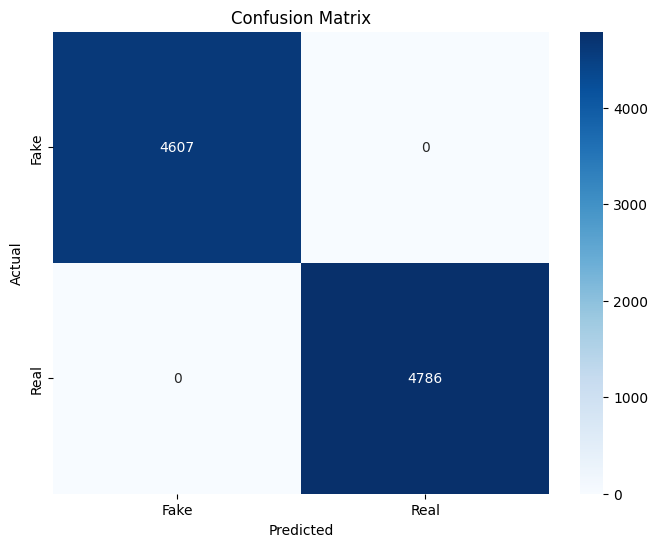

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()